## Laila Fitria - Exploratory Data Analysis

### Problem Statement

Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals. 

This data set is wide ranging in the sense it encompasses stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each team was allotted from the TV rights deal. 
This data was gathered from 
* BBC Sports Football, 
* Premierleague.com 
* Transfermarkt.co.uk

Some goals of this project: 
1.	Is this data clean? 
2.	How is the point distribution of the epl team? and which team is an anomaly?
3.	Which team has the best attack? 
4.	Which team has the best defence? 
5.	Which team is good in the financial aspect? 
6.	Explore your creativity!

### Lets Explore

#### No.1 : Is this data clean?

See data quality from :
* missing value
* type correctness

In [1]:
# load library 

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [2]:
# load data
df = pd.read_csv('epl_1819.csv')

In [3]:
#function for checking missing value
def check_missing(df):
    percent=df.isnull().sum()/df.shape[0]*100
    freq=df.isnull().sum()
    types=df.dtypes
    df_miss=pd.DataFrame({'percentage':percent, 'frequency':freq, 'var_type':types})
    df_miss.sort_values(by='frequency',ascending= False, inplace=True)
    return df_miss[df_miss['percentage']>0]

In [4]:
check_missing(df)

,percentage,frequency,var_type


As shown, there is no missing value. Then lets see about data quality

In [5]:
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


If you can see, there are some columns have non correct type such as :
* attack_passes
* attack_passes_long
* attack_passes_back
* defence_clearances

In [6]:
df[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
attack_passes         20 non-null object
attack_passes_long    20 non-null object
attack_passes_back    20 non-null object
defence_clearances    20 non-null object
dtypes: object(4)
memory usage: 720.0+ bytes


In [7]:
df[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']].sample(6)

,attack_passes,attack_passes_long,attack_passes_back,defence_clearances
1,"23,638","2,250","3,416",639
14,"13,011","2,898","2,046","1,080"
19,"15,902","2,603","2,492",658
12,"13,490","2,680","1,999","1,120"
9,"16,358","2,315","2,273",855
13,"15,943","1,932","2,249","1,019"


They have "," point which cause the type is object, it supposed to be int, so we need to replace it with ""

In [8]:
# replace the ","
df['attack_passes'] = df['attack_passes'].replace({',' : ''}, regex=True).astype('int64')
df['attack_passes_long'] = df['attack_passes_long'].replace({',' : ''}, regex=True).astype('int64')
df['attack_passes_back'] = df['attack_passes_back'].replace({',' : ''}, regex=True).astype('int64')
df['defence_clearances'] = df['defence_clearances'].replace({',' : ''}, regex=True).astype('int64')

In [9]:
df[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
attack_passes         20 non-null int64
attack_passes_long    20 non-null int64
attack_passes_back    20 non-null int64
defence_clearances    20 non-null int64
dtypes: int64(4)
memory usage: 720.0 bytes


For now, the data is clean

#### No.2 : How is the point distribution of the epl team? and which team is an anomaly?

Text(0.5, 1.0, 'Point Distribution')

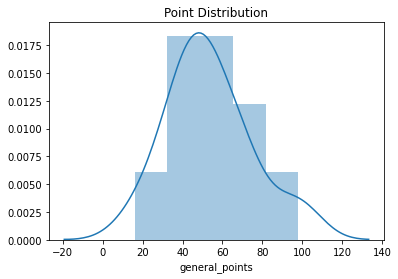

In [9]:
# lets see the distribution of EPL team using histogram
sns.distplot(df['general_points']).set_title('Point Distribution')

The histogram indicates that the point has normal distribution, it supposed to be no outlier, but we need to ensure using boxplot

In [10]:
# check the central tendency of data
df['general_points'].describe()

count    20.000000
mean     53.450000
std      21.007455
min      16.000000
25%      39.750000
50%      51.000000
75%      67.000000
max      98.000000
Name: general_points, dtype: float64

Mean is 53.45 , and median is 51. There is no big difference between mean and median, its mean data has normal distribution

Text(0.5, 1.0, 'Point Distribution')

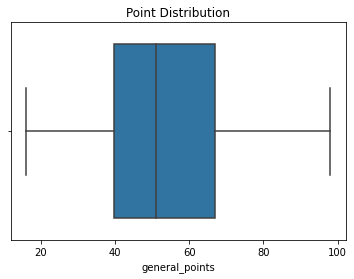

In [11]:
# lets see the distribution of EPL team using histogram
sns.boxplot(df['general_points']).set_title('Point Distribution')

From the boxplot above, we can see there is no outlier. Thats mean, there is no team which considered as anomaly team based on point distribution

#### No.3 : Which team has the best attack?

In [12]:
# lets see all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

In [13]:
# lets collect feature contains attack word
atk_feature = ['attack_scored', 'attack_passes',
                   'attack_passes_through','attack_passes_long',
                   'attack_passes_back','attack_crosses',
                   'attack_crosses','attack_corners_taken', 
                   'attack_shots','attack_shots_on_target', 
                   'attack_goals_headed','attack_goals_penalty', 
                   'attack_goals_box','attack_goals_outsidebox', 
                   'attack_goals_counter','attack_goals_freekick', 
                   'attack_posession', 'attack_pass_accuracy']

In [14]:
# copy the initial data
import copy
df_3 = copy.deepcopy(df)
df_3 = df_3[atk_feature]
df_3.head()

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,95,26581,112,1814,4240,783,783,298,683,260,12,3,80,15,5,2,64.0,89.0
1,89,23638,98,2250,3416,721,721,249,575,226,19,7,84,5,6,1,58.8,84.4
2,63,25070,146,1774,3874,692,692,215,607,198,8,5,54,9,1,1,59.9,87.6
3,67,21295,87,2267,3191,643,643,194,537,189,14,4,53,14,5,2,56.7,83.2
4,73,20805,65,2062,3102,605,605,209,467,170,5,4,62,11,3,3,56.1,83.3


In [15]:
# add column mean attack score from all team
df_3['avg_atk_score'] = df_3.mean(axis=1)

# add team column
df_3['Team'] = df['Team']
df_3.head()

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy,avg_atk_score,Team
0,95,26581,112,1814,4240,783,783,298,683,260,12,3,80,15,5,2,64.0,89.0,1995.500000,Manchester City
1,89,23638,98,2250,3416,721,721,249,575,226,19,7,84,5,6,1,58.8,84.4,1791.566667,Liverpool
2,63,25070,146,1774,3874,692,692,215,607,198,8,5,54,9,1,1,59.9,87.6,1864.250000,Chelsea
3,67,21295,87,2267,3191,643,643,194,537,189,14,4,53,14,5,2,56.7,83.2,1630.272222,Tottenham
4,73,20805,65,2062,3102,605,605,209,467,170,5,4,62,11,3,3,56.1,83.3,1577.244444,Arsenal


In [16]:
# find the max avg atk score
df_3[['Team','avg_atk_score']].sort_values(by='avg_atk_score', ascending=False).head()

,Team,avg_atk_score
0,Manchester City,1995.500000
2,Chelsea,1864.250000
1,Liverpool,1791.566667
3,Tottenham,1630.272222
4,Arsenal,1577.244444


The Highest mean attack score is manchester city

#### No.4 : Which team has the best defence?

In [17]:
# lets collect feature contains defene word
def_feature = ['defence_saves', 'defence_blocks', 'defence_interceptions',
       'defence_tackles', 'defence_tackles_last_man', 'defence_clearances',
       'defence_clearances_headed']

In [18]:
# copy the initial data
import copy
df_4 = copy.deepcopy(df)
df_4 = df_4[def_feature]
df_4.head()

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed
0,58,63,362,518,0,543,295
1,76,78,314,610,2,639,317
2,85,73,351,618,2,593,330
3,121,112,326,626,3,770,411
4,133,118,412,609,2,762,404


In [19]:
# add column mean attack score from all team
df_4['avg_deff_score'] = df_4.mean(axis=1)

# add team column
df_4['Team'] = df['Team']
df_4.head()

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,avg_deff_score,Team
0,58,63,362,518,0,543,295,262.714286,Manchester City
1,76,78,314,610,2,639,317,290.857143,Liverpool
2,85,73,351,618,2,593,330,293.142857,Chelsea
3,121,112,326,626,3,770,411,338.428571,Tottenham
4,133,118,412,609,2,762,404,348.571429,Arsenal


In [20]:
# find the max avg atk score
df_4[['Team','avg_deff_score']].sort_values(by='avg_deff_score', ascending=False).head()

,Team,avg_deff_score
12,Newcastle,448.142857
15,Southampton,441.142857
14,Burnley,419.142857
17,Cardiff,414.428571
16,Brighton,407.000000


The Highest mean deff score is Newcastle

#### No.5 : Which team is good in the financial aspect?

In [21]:
# lets collect feature contains Financial word
finance_feature = ['finance _tv_revenue','finance _team_market','finance _market_average']

In [22]:
# copy the initial data
import copy
df_5 = copy.deepcopy(df)
df_5 = df_5[finance_feature]
df_5.head()

,finance _tv_revenue,finance _team_market,finance _market_average
0,150986355,1003200000,39987200
1,152425146,836440000,34848000
2,146030216,779460000,29981600
3,145230801,735240000,29409600
4,142193180,701800000,26989600


In [23]:
# add column mean attack score from all team
df_5['avg_financial_score'] = df_5.mean(axis=1)

# add team column
df_5['Team'] = df['Team']
df_5.head()

,finance _tv_revenue,finance _team_market,finance _market_average,avg_financial_score,Team
0,150986355,1003200000,39987200,3.980579e+08,Manchester City
1,152425146,836440000,34848000,3.412377e+08,Liverpool
2,146030216,779460000,29981600,3.184906e+08,Chelsea
3,145230801,735240000,29409600,3.032935e+08,Tottenham
4,142193180,701800000,26989600,2.903276e+08,Arsenal


In [24]:
# find the max avg atk score
df_5[['Team','avg_financial_score']].sort_values(by='avg_financial_score', ascending=False).head()

,Team,avg_financial_score
0,Manchester City,3.980579e+08
1,Liverpool,3.412377e+08
2,Chelsea,3.184906e+08
3,Tottenham,3.032935e+08
4,Arsenal,2.903276e+08


The Highest mean financial score is Manchester City

#### No.6 : Do creativity

In [25]:
# lets merge all column we get before with initial df
df['avg_atk_score'] = df_3['avg_atk_score']
df['avg_deff_score'] = df_4['avg_deff_score']
df['avg_financial_score'] = df_5['avg_financial_score']
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,avg_atk_score,avg_deff_score,avg_financial_score
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814,4240,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,1995.500000,262.714286,3.980579e+08
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250,3416,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4,1791.566667,290.857143,3.412377e+08
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,25070,146,1774,3874,692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6,1864.250000,293.142857,3.184906e+08
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,21295,87,2267,3191,643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2,1630.272222,338.428571,3.032935e+08
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,20805,65,2062,3102,605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3,1577.244444,348.571429,2.903276e+08


#### a. Lets see the correlation between mean atk data and deff atk data by competition category

[Text(0.5, 1.0, 'Correlation between mean atk data and deff atk data by competition category')]

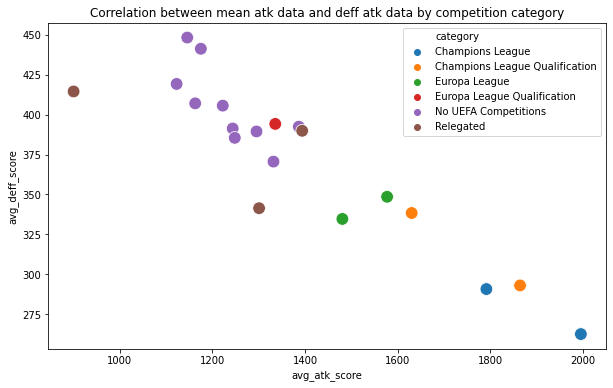

In [26]:
plt.figure(figsize = (10, 6))
sns.scatterplot(
    x='avg_atk_score', y="avg_deff_score",
    data=df,
    hue = df['category'],
    s=160,
).set(title='Correlation between mean atk data and deff atk data by competition category')

From the plot, it can be seen that
1. The no UEFA competition category tends to play defensively and has a low attack rate compared to other competitions
2. Champions league has a high attack rate, both from the start of qualification and after qualification
3. Europe League looks balanced between attack and defense
4. Offense has a negative correlation to defense, in other words, if a team has a high attack rate, it tends to have a low defense

#### b. The Best Match Category based on Finance live games televised

<AxesSubplot:xlabel='finance _live_games_televised', ylabel='category'>

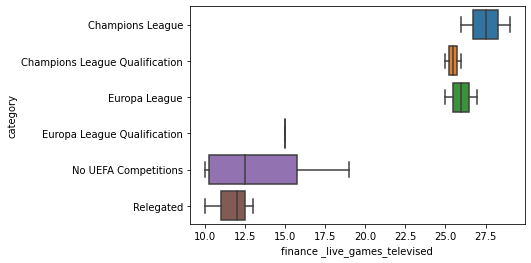

In [27]:
sns.boxplot(y='category',x='finance _live_games_televised',data=df)

It can be seen that the most favorite categories to watch are the champions league, and the european league

#### c. Team with highest won

<AxesSubplot:xlabel='general_won', ylabel='Team'>

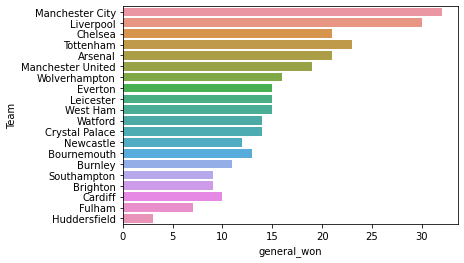

In [28]:
sns.barplot(y='Team', x='general_won', data=df)

It can be seen that from this data, team that has highest won is Manchester city 

#### Actually, still there are lots of insight we can get from this data, depend on what information you need

#### This is the end of this current analysis, see you later at another analysis